# KNN

In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('cancer-dataset.txt', header= None)

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [5]:
columns = ['id', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape', 'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses', 'Class']

In [6]:
df.columns = columns

In [7]:
df.head()

,id,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [8]:
df.shape

(699, 11)

In [9]:
df.drop('id', axis=1, inplace=True)

In [10]:
df.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Clump Thickness              699 non-null    int64 
 1   Uniformity of Cell Size      699 non-null    int64 
 2   Uniformity of Cell Shape     699 non-null    int64 
 3   Marginal Adhesion            699 non-null    int64 
 4   Single Epithelial Cell Size  699 non-null    int64 
 5   Bare Nuclei                  699 non-null    object
 6   Bland Chromatin              699 non-null    int64 
 7   Normal Nucleoli              699 non-null    int64 
 8   Mitoses                      699 non-null    int64 
 9   Class                        699 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Clump Thickness,699.0,4.417740,2.815741,1.0,2.0,4.0,6.0,10.0
Uniformity of Cell Size,699.0,3.134478,3.051459,1.0,1.0,1.0,5.0,10.0
Uniformity of Cell Shape,699.0,3.207439,2.971913,1.0,1.0,1.0,5.0,10.0
Marginal Adhesion,699.0,2.806867,2.855379,1.0,1.0,1.0,4.0,10.0
Single Epithelial Cell Size,699.0,3.216023,2.214300,1.0,2.0,2.0,4.0,10.0
Bland Chromatin,699.0,3.437768,2.438364,1.0,2.0,3.0,5.0,10.0
Normal Nucleoli,699.0,2.866953,3.053634,1.0,1.0,1.0,4.0,10.0
Mitoses,699.0,1.589413,1.715078,1.0,1.0,1.0,1.0,10.0
Class,699.0,2.689557,0.951273,2.0,2.0,2.0,4.0,4.0


In [13]:
df.isnull().sum()

,0
Clump Thickness,0
Uniformity of Cell Size,0
Uniformity of Cell Shape,0
Marginal Adhesion,0
Single Epithelial Cell Size,0
Bare Nuclei,0
Bland Chromatin,0
Normal Nucleoli,0
Mitoses,0
Class,0


In [14]:
df.Class.value_counts()

,count
Class,
2,458
4,241


In [15]:
df['Bare Nuclei'].unique()

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

In [21]:
df[df['Bare Nuclei'] == '?']


,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
23,8,4,5,1,2,?,7,3,1,4
40,6,6,6,9,6,?,7,8,1,2
139,1,1,1,1,1,?,2,1,1,2
145,1,1,3,1,2,?,2,1,1,2
158,1,1,2,1,3,?,1,1,1,2
164,5,1,1,1,2,?,3,1,1,2
235,3,1,4,1,2,?,3,1,1,2
249,3,1,1,1,2,?,3,1,1,2
275,3,1,3,1,2,?,2,1,1,2
292,8,8,8,1,2,?,6,10,1,4


In [22]:
df = df[df['Bare Nuclei'] != '?' ]

In [23]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Clump Thickness,683.0,4.442167,2.820761,1.0,2.0,4.0,6.0,10.0
Uniformity of Cell Size,683.0,3.150805,3.065145,1.0,1.0,1.0,5.0,10.0
Uniformity of Cell Shape,683.0,3.215227,2.988581,1.0,1.0,1.0,5.0,10.0
Marginal Adhesion,683.0,2.830161,2.864562,1.0,1.0,1.0,4.0,10.0
Single Epithelial Cell Size,683.0,3.234261,2.223085,1.0,2.0,2.0,4.0,10.0
Bland Chromatin,683.0,3.445095,2.449697,1.0,2.0,3.0,5.0,10.0
Normal Nucleoli,683.0,2.869693,3.052666,1.0,1.0,1.0,4.0,10.0
Mitoses,683.0,1.603221,1.732674,1.0,1.0,1.0,1.0,10.0
Class,683.0,2.699854,0.954592,2.0,2.0,2.0,4.0,4.0


In [24]:
df['Bare Nuclei'].unique()

array(['1', '10', '2', '4', '3', '9', '7', '5', '8', '6'], dtype=object)

<Axes: >

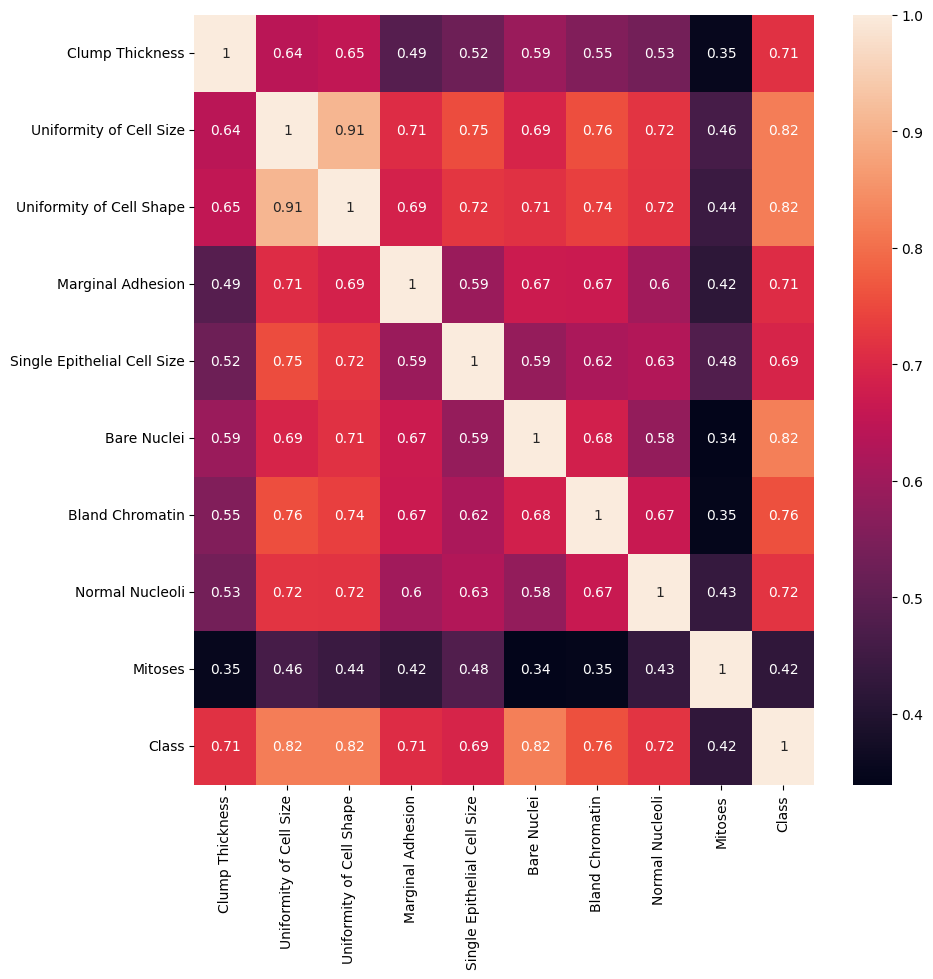

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)

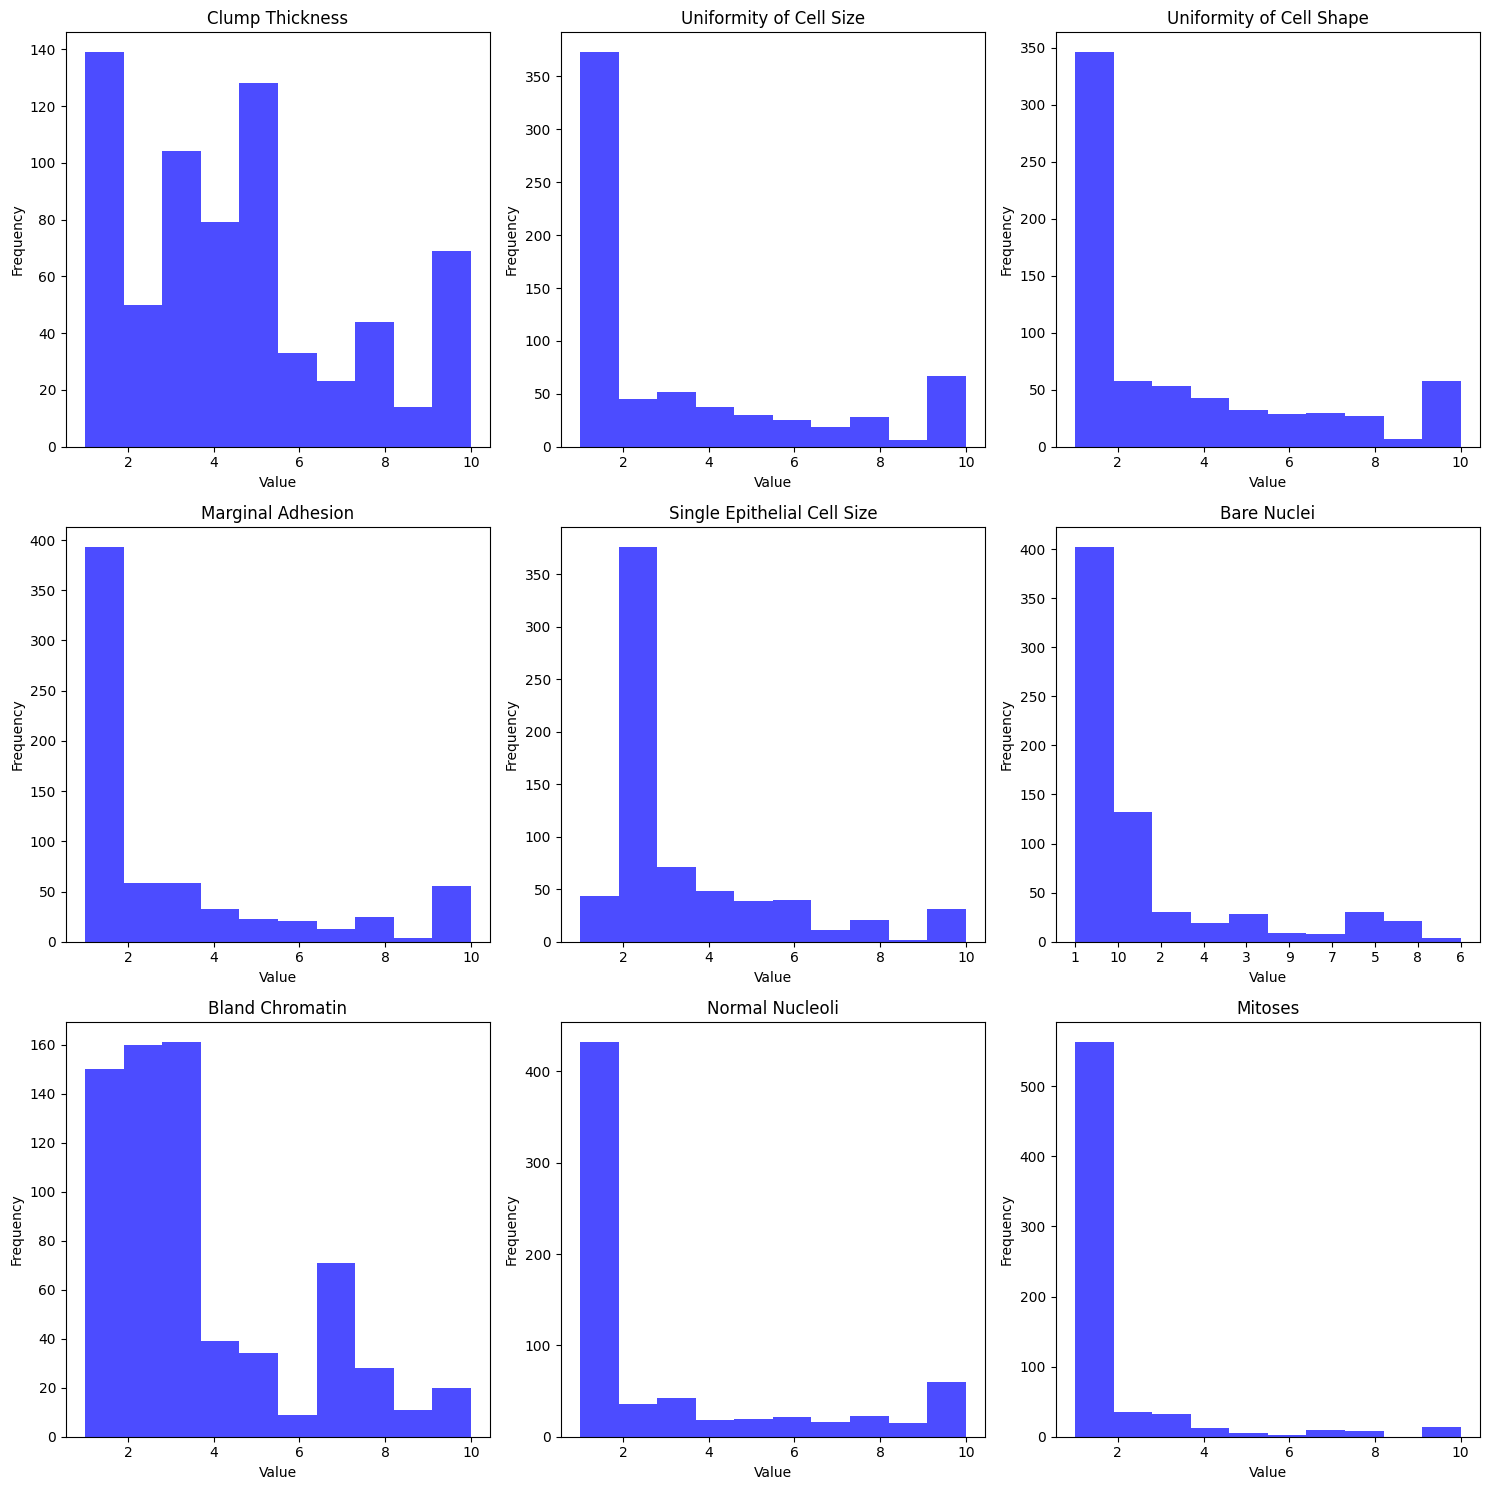

In [31]:
import matplotlib.pyplot as plt

# Define the columns to plot (excluding 'Class' since it's categorical)
columns_to_plot = df.columns[:-1]  # Excluding the last column ('Class')

# Create 3x3 subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

# Flatten axes array for easy iteration
axes = axes.flatten()

# Plot each column in a subplot
for i, col in enumerate(columns_to_plot):
    axes[i].hist(df[col], bins=10, alpha=0.7, color='blue')
    axes[i].set_title(col)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()



In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# 1. Split the data (excluding 'Class' for scaling)
X = df.drop(columns=['Class'])  # Features
y = df['Class']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Initialize the scaler
scaler = StandardScaler()

# 3. Fit the scaler only on training data
X_train_scaled = scaler.fit_transform(X_train)

# 4. Transform the test set using the same scaler
X_test_scaled = scaler.transform(X_test)

# Now X_train_scaled and X_test_scaled are ready for KNN



In [39]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [40]:
KNN= KNeighborsClassifier(n_neighbors=3)
KNN.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [41]:
y_pred = KNN.predict(X_test_scaled)

In [42]:
accuracy_score(y_test, y_pred)

0.9635036496350365

In [43]:
y_test.value_counts()

,count
Class,
2,79
4,58


In [44]:
from sklearn.metrics import confusion_matrix

<Axes: >

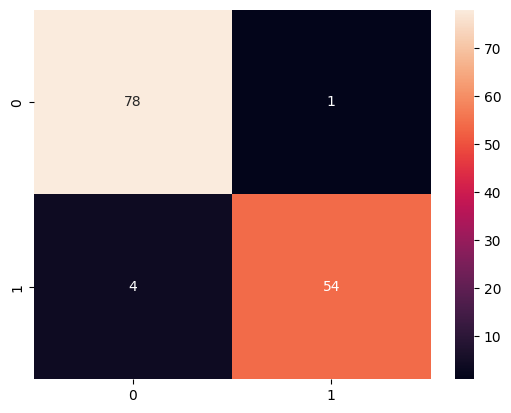

In [47]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

In [52]:
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc

In [51]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           2       0.95      0.99      0.97        79
           4       0.98      0.93      0.96        58

    accuracy                           0.96       137
   macro avg       0.97      0.96      0.96       137
weighted avg       0.96      0.96      0.96       137



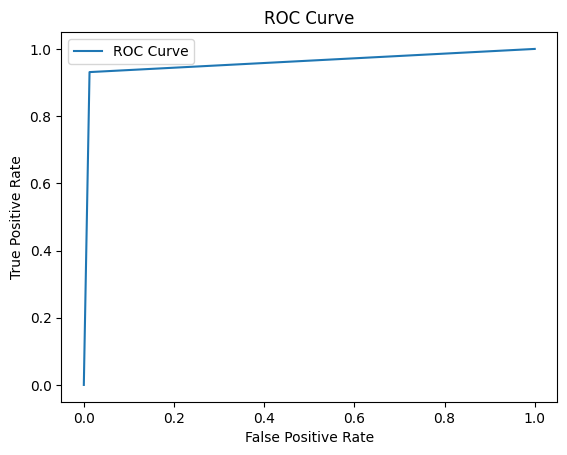

In [57]:
from sklearn.metrics import roc_curve

# Convert y_test and y_pred to binary values (mapping 2 -> 0, 4 -> 1)
y_test_binary = (y_test == 4).astype(int)
y_pred_binary = (y_pred == 4).astype(int)

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test_binary, y_pred_binary)

# Now you can plot the ROC curve
import matplotlib.pyplot as plt

plt.plot(fpr, tpr, linestyle='-', label="ROC Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [69]:
# Get probability predictions instead of class predictions
y_pred_prob = KNN.predict_proba(X_test_scaled)[:, 1]  # Select probabilities for the positive class (class 4)
y_pred_prob

array([1.        , 1.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.33333333, 0.66666667, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.33333333,
       1.        , 0.        , 0.66666667, 0.        , 1.        ,
       1.        , 0.        , 1.        , 0.        , 0.        ,
       0.        , 1.        , 1.        , 0.        , 0.33333333,
       0.        , 1.        , 1.        , 1.        , 0.        ,
       0.        , 1.        , 0.        , 1.        , 0.66666667,
       0.        , 1.        , 1.        , 0.        , 0.        ,
       1.        , 0.        , 1.        , 0.        , 1.        ,
       0.        , 0.        , 0.        , 1.        , 0.        ,
       1.        , 0.66666667, 0.        , 0.        , 1.        ,
       0.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 1.        , 0.66666667, 0.        , 0.        ,
       0.66666667, 0.        , 0.        , 0.        , 1.     

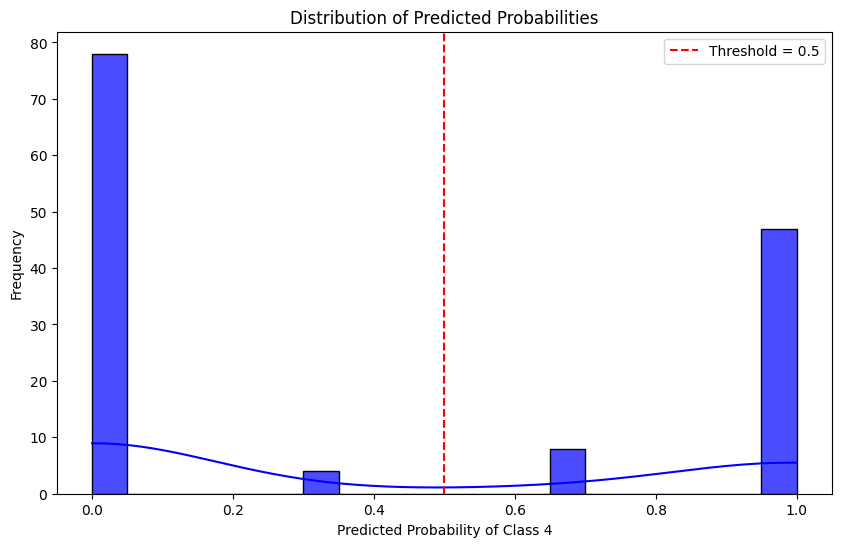

In [70]:

import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram of predicted probabilities
plt.figure(figsize=(10, 6))
sns.histplot(y_pred_prob, bins=20, kde=True, color='blue', alpha=0.7)

# Add labels and title
plt.xlabel('Predicted Probability of Class 4')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Probabilities')
plt.axvline(0.5, color='red', linestyle='dashed', label='Threshold = 0.5')  # Default decision boundary
plt.legend()

# Show the plot
plt.show()


In [71]:
for t in [0.3, 0.5, 0.7, 0.9]:
    y_pred_adjusted = (y_pred_prob >= t).astype(int) * 2 + 2
    print(f"Threshold {t}: {sum(y_pred_adjusted == 4)} classified as 4, {sum(y_pred_adjusted == 2)} classified as 2")


Threshold 0.3: 59 classified as 4, 78 classified as 2
Threshold 0.5: 55 classified as 4, 82 classified as 2
Threshold 0.7: 47 classified as 4, 90 classified as 2
Threshold 0.9: 47 classified as 4, 90 classified as 2


Best Threshold: 0.2 with K=9 (F1-Score=0.991)


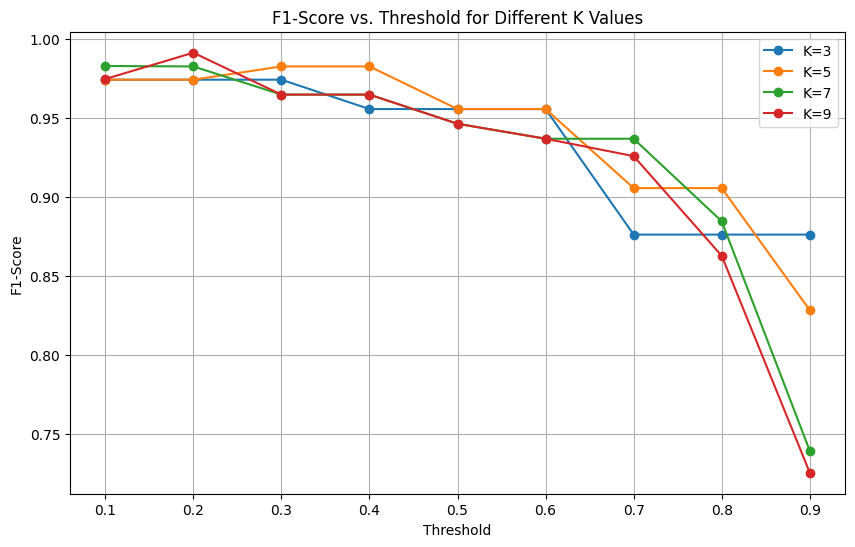

ModuleNotFoundError: No module named 'ace_tools'

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 1️⃣ Load & Preprocess Data
X = df.drop(columns=['Class'])  # Features
y = df['Class']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert y_test to binary (Class 2 -> 0, Class 4 -> 1)
y_test_binary = (y_test == 4).astype(int)

# Define different thresholds to test
thresholds_list = np.linspace(0.1, 0.9, 9)  # Thresholds from 0.1 to 0.9

# 2️⃣ Train & Evaluate KNN with Different Thresholds
best_f1 = 0  # Track best F1-score
best_threshold = 0
best_k = 0
results = []

for k in range(3, 10, 2):  # Test KNN with k=3,5,7,9
    # Train KNN model
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)

    # Get probability predictions for class 4
    y_pred_prob = knn.predict_proba(X_test_scaled)[:, 1]

    for threshold in thresholds_list:
        # Apply threshold to classify
        y_pred_custom = (y_pred_prob >= threshold).astype(int) * 2 + 2  # Convert {0,1} to {2,4}

        # Calculate performance metrics
        acc = accuracy_score(y_test, y_pred_custom)
        precision = precision_score(y_test, y_pred_custom, pos_label=4)
        recall = recall_score(y_test, y_pred_custom, pos_label=4)
        f1 = f1_score(y_test, y_pred_custom, pos_label=4)

        # Save best threshold based on F1-score
        if f1 > best_f1:
            best_f1 = f1
            best_threshold = threshold
            best_k = k

        results.append([k, threshold, acc, precision, recall, f1])

# Convert results to DataFrame
df_results = pd.DataFrame(results, columns=['K', 'Threshold', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

# 3️⃣ Display Best Threshold
print(f"Best Threshold: {best_threshold} with K={best_k} (F1-Score={best_f1:.3f})")

# 4️⃣ Plot Performance for Different Thresholds
plt.figure(figsize=(10, 6))
for k in range(3, 10, 2):
    subset = df_results[df_results['K'] == k]
    plt.plot(subset['Threshold'], subset['F1-Score'], marker='o', label=f"K={k}")

plt.xlabel('Threshold')
plt.ylabel('F1-Score')
plt.title('F1-Score vs. Threshold for Different K Values')
plt.legend()
plt.grid()
plt.show()

# 5️⃣ Show Results Table
import ace_tools as tools
tools.display_dataframe_to_user(name="Threshold and KNN Performance Results", dataframe=df_results)
